In [3]:
from matplotlib import image
from matplotlib import pyplot

import time

import os
import numpy as np
import glob
import shutil
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
from tqdm import tqdm
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [16]:
base_dir = '../plant-seedlings-classification/data'

In [17]:
base_dir

'../plant-seedlings-classification/data'

In [18]:
len(os.listdir(base_dir))

14

In [19]:
classes = os.listdir(base_dir)

In [20]:
#for cl in classes:
#  images = glob.glob(img_path + '/*.png')
#  print("{}: {} Images".format(cl, len(images)))
#  num_train = int(round(len(images)*0.8))
#  train, val = images[:num_train], images[num_train:]

#  for t in train:
#    if not os.path.exists(os.path.join(base_dir, 'train', cl)):
#      os.makedirs(os.path.join(base_dir, 'train', cl))
#    shutil.move(t, os.path.join(base_dir, 'train', cl))

#  for v in val:
#    if not os.path.exists(os.path.join(base_dir, 'val', cl)):
#      os.makedirs(os.path.join(base_dir, 'val', cl))
#    shutil.move(v, os.path.join(base_dir, 'val', cl))

In [21]:
#round(len(images)*0.8)

In [22]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

In [23]:
batch_size = 100
IMG_SHAPE = 150 

In [24]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )


train_data_gen = image_gen_train.flow_from_directory(
                                                batch_size=batch_size,
                                                directory=train_dir,
                                                shuffle=True,
                                                target_size=(IMG_SHAPE,IMG_SHAPE),
                                                class_mode='sparse'
                                                )

Found 3801 images belonging to 12 classes.


In [25]:
train_data_gen

In [17]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]

In [19]:
augmented_images

[array([[[0.34383857, 0.2654072 , 0.21154845],
         [0.32604504, 0.24761365, 0.1838696 ],
         [0.3137255 , 0.23164478, 0.16044831],
         ...,
         [0.2498119 , 0.2056451 , 0.20542306],
         [0.2774871 , 0.22890498, 0.23369475],
         [0.28923345, 0.2393181 , 0.24499142]],
 
        [[0.33915713, 0.25579453, 0.19988288],
         [0.3460198 , 0.26758844, 0.21494147],
         [0.32822627, 0.24979489, 0.18726262],
         ...,
         [0.25548968, 0.20838298, 0.20148481],
         [0.25033766, 0.20186199, 0.1968749 ],
         [0.24572214, 0.2031687 , 0.19771034]],
 
        [[0.32584062, 0.23581974, 0.17324984],
         [0.337703  , 0.2536133 , 0.19697458],
         [0.34820104, 0.26976967, 0.2183345 ],
         ...,
         [0.25864628, 0.21060646, 0.20441058],
         [0.25232875, 0.21057735, 0.2008137 ],
         [0.24882247, 0.21401566, 0.19780652]],
 
        ...,
 
        [[0.25426653, 0.18990126, 0.16151139],
         [0.23205519, 0.16980529, 0.14776

In [26]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

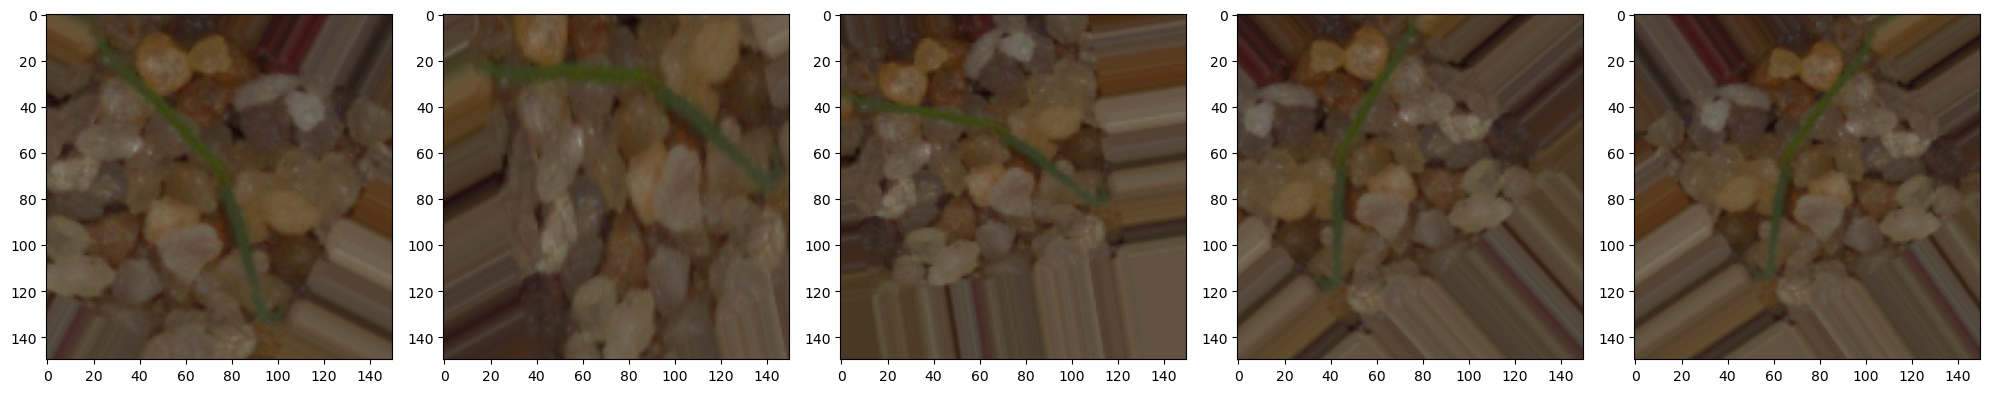

In [40]:
plotImages(augmented_images)

In [27]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=val_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='sparse')

Found 949 images belonging to 12 classes.


In [20]:
model = Sequential()

model.add(Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_SHAPE,IMG_SHAPE, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(12))

In [21]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 64)       0

In [23]:
epochs = 80

history = model.fit(
    train_data_gen,
    steps_per_epoch=int(np.ceil(train_data_gen.n / float(batch_size))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(val_data_gen.n / float(batch_size)))
)

Epoch 1/80
39/39 [==============================] - 96s 2s/step - loss: 2.4007 - accuracy: 0.1594 - val_loss: 2.2207 - val_accuracy: 0.2677
Epoch 2/80
39/39 [==============================] - 94s 2s/step - loss: 2.0317 - accuracy: 0.2920 - val_loss: 1.6992 - val_accuracy: 0.4025
Epoch 3/80
39/39 [==============================] - 133s 3s/step - loss: 1.8973 - accuracy: 0.3333 - val_loss: 1.9243 - val_accuracy: 0.3604
Epoch 4/80
39/39 [==============================] - 116s 3s/step - loss: 1.8456 - accuracy: 0.3696 - val_loss: 1.4675 - val_accuracy: 0.5058
Epoch 5/80
39/39 [==============================] - 125s 3s/step - loss: 1.6689 - accuracy: 0.4149 - val_loss: 1.3744 - val_accuracy: 0.5184
Epoch 6/80
39/39 [==============================] - 131s 3s/step - loss: 1.5341 - accuracy: 0.4641 - val_loss: 1.2010 - val_accuracy: 0.6006
Epoch 7/80
39/39 [==============================] - 103s 3s/step - loss: 1.4272 - accuracy: 0.5014 - val_loss: 1.3235 - val_accuracy: 0.5174
Epoch 8/80
39/3

Epoch 59/80
39/39 [==============================] - 100s 3s/step - loss: 0.4591 - accuracy: 0.8395 - val_loss: 0.3374 - val_accuracy: 0.8704
Epoch 60/80
39/39 [==============================] - 101s 3s/step - loss: 0.4601 - accuracy: 0.8358 - val_loss: 0.2813 - val_accuracy: 0.8925
Epoch 61/80
39/39 [==============================] - 101s 3s/step - loss: 0.4769 - accuracy: 0.8364 - val_loss: 0.4194 - val_accuracy: 0.8514
Epoch 62/80
39/39 [==============================] - 101s 3s/step - loss: 0.6862 - accuracy: 0.7943 - val_loss: 0.8171 - val_accuracy: 0.6765
Epoch 63/80
39/39 [==============================] - 100s 3s/step - loss: 0.8003 - accuracy: 0.7245 - val_loss: 0.4212 - val_accuracy: 0.8535
Epoch 64/80
39/39 [==============================] - 99s 3s/step - loss: 0.5506 - accuracy: 0.8061 - val_loss: 0.3148 - val_accuracy: 0.8872
Epoch 65/80
39/39 [==============================] - 101s 3s/step - loss: 0.4812 - accuracy: 0.8306 - val_loss: 0.3164 - val_accuracy: 0.8988
Epoch 6

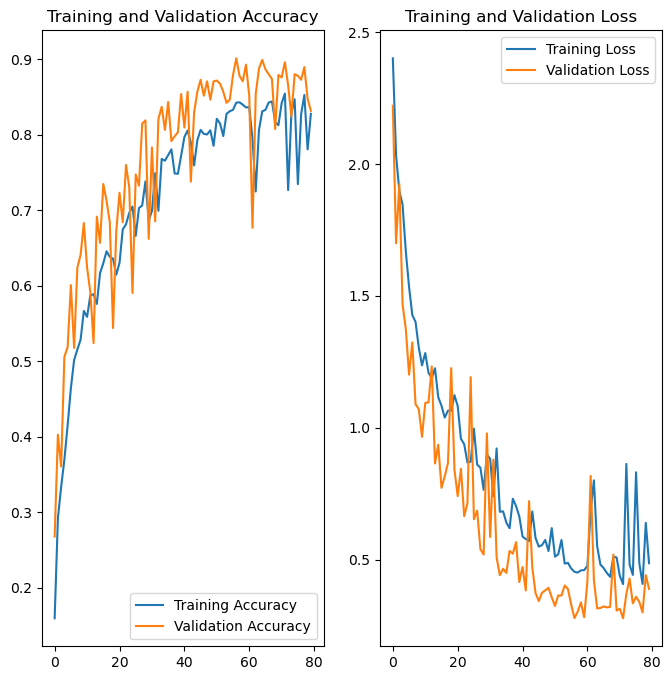

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [25]:
t = time.time()

export_path_keras = "./{}.h5".format(int(t))
print(export_path_keras)

model.save(export_path_keras)

./1671592035.h5


In [59]:
ls

 磁碟區 C 中的磁碟是 Windows
 磁碟區序號:  3A4A-CD56

 C:\Users\spin\Desktop\tensorFinal\plantSeedlings\plant-seedlings-classification 的目錄

2022/12/19  下午 01:52    <DIR>          .
2022/12/19  下午 01:52    <DIR>          ..
2022/12/19  上午 10:01    <DIR>          .ipynb_checkpoints
2022/12/19  下午 01:50       127,831,776 1671429037.h5
2022/12/19  上午 11:02    <DIR>          data
2022/12/19  下午 01:52           978,805 DecNineteen.ipynb
2019/12/11  下午 11:36            19,863 sample_submission.csv
2022/12/19  上午 10:26    <DIR>          test
               3 個檔案     128,830,444 位元組
               5 個目錄  93,878,751,232 位元組可用


In [26]:
classes

['Black-grass',
 'Charlock',
 'Cleavers',
 'Common Chickweed',
 'Common wheat',
 'Fat Hen',
 'Loose Silky-bent',
 'Maize',
 'Scentless Mayweed',
 'Shepherds Purse',
 'Small-flowered Cranesbill',
 'Sugar beet',
 'train',
 'val']

In [28]:
test_dir = '../plant-seedlings-classification/test'

In [29]:
len(os.listdir(test_dir))

1

In [30]:
tclasses = os.listdir(test_dir)
tclasses[0]

'testdata'

In [31]:
image_gen_test = ImageDataGenerator(rescale=1./255)
test_data_gen = image_gen_train.flow_from_directory(
                                                directory=test_dir,
                                                target_size=(IMG_SHAPE,IMG_SHAPE),
                                                class_mode='sparse'
                                                )

Found 794 images belonging to 1 classes.


In [143]:
test_data_gen

In [144]:
images = [test_data_gen[0][0][0] for i in range(5)]

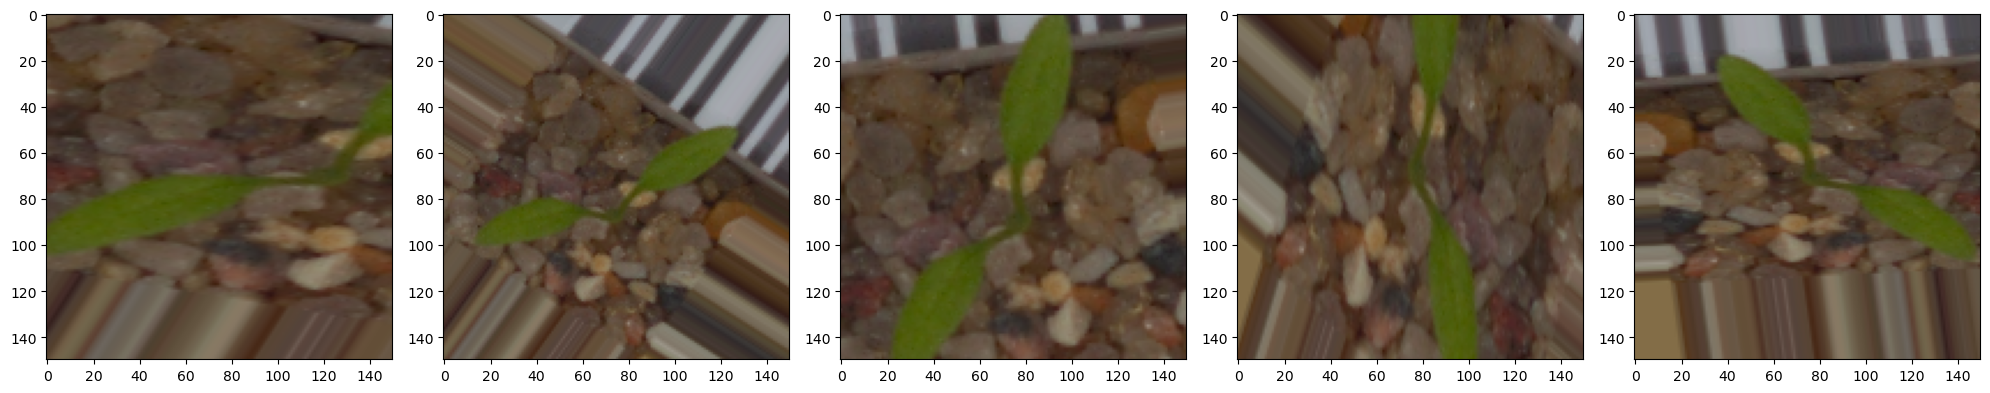

In [145]:
plotImages(images)

In [31]:
predictions = model.predict(test_data_gen)

25/25 [==============================] - 9s 347ms/step


In [32]:
predictions

array([[  2.434833  , -10.423712  , -10.605016  , ...,  -8.078335  ,
         -1.9989371 ,  -3.807965  ],
       [ -6.0137763 ,  -4.8727164 ,  -6.827378  , ...,   3.9291773 ,
         -0.11356981,  -2.6873813 ],
       [ -4.823386  ,  -8.184067  ,  -6.744631  , ...,   2.9308305 ,
         -1.5114951 ,  -1.5356197 ],
       ...,
       [ -4.480364  ,  -4.0786204 ,  -7.520654  , ...,  -2.860011  ,
          8.976041  ,  -1.6529436 ],
       [ -3.633056  ,   0.64314604,  -1.7404085 , ...,  -3.453066  ,
         -5.4944553 ,   4.775548  ],
       [-11.021583  ,  -2.088606  ,  -5.043386  , ...,   4.5472436 ,
         -7.2456317 ,   0.06060678]], dtype=float32)

In [33]:
predictions.shape[0]

794

In [34]:
results = []
for i in range(predictions.shape[0]):
    results.append(np.argmax(predictions[i]))

In [35]:
np.argmax(results)

8

In [36]:
results = np.array(results)

In [37]:
results.shape

(794,)

In [38]:
results

array([ 6,  3,  3,  6,  6,  6,  0,  2, 11, 11,  6,  3,  6,  3,  6,  7,  5,
        0,  5,  2,  9,  8, 11,  6,  5,  8, 11, 10,  6,  1,  4,  3, 10,  2,
        8,  1,  8, 11,  7,  3,  3, 10,  9,  3, 11, 10, 11,  3,  3,  2,  3,
        8,  8,  8,  3,  3,  5,  4,  0,  8,  1,  4,  2,  8,  5,  0, 10,  4,
        6,  1,  0,  6,  3,  3, 10,  3,  8,  4, 10,  2,  3, 10,  6,  0,  3,
        2,  5,  1,  6, 11,  6, 10,  0,  3,  8,  5, 11,  3,  8,  1, 11,  1,
        9,  6,  0,  3,  8,  4,  4,  6,  1,  3,  0,  3,  7, 10, 11, 10,  7,
        8,  8,  5,  6,  6,  0,  6,  6,  9,  3,  8,  8,  0,  5,  3,  6, 11,
       10,  3, 11,  3,  7,  3,  7,  3,  8, 11,  5,  7,  1, 11,  6,  6,  6,
        1,  1,  3,  1,  2,  8,  1,  4,  0,  3,  8,  4, 11,  7,  5,  8,  1,
        2, 11,  2,  8,  1,  2, 10,  9,  8,  6, 10,  5,  6,  6,  3,  6,  7,
        2,  2,  3,  5, 11,  0, 11,  3,  1,  5,  4, 11,  6,  8,  0,  4,  3,
       10,  5,  3,  2,  6,  6,  1,  6,  8,  6,  3,  1,  1,  4,  1, 10,  5,
        3, 10,  2,  2,  3

In [189]:
val_data_gen[0][0][0][0]

array([[0.34509805, 0.27450982, 0.22352943],
       [0.3529412 , 0.2784314 , 0.21176472],
       [0.34117648, 0.23529413, 0.1764706 ],
       [0.30588236, 0.19607845, 0.13725491],
       [0.36078432, 0.28627452, 0.22352943],
       [0.3372549 , 0.2627451 , 0.20392159],
       [0.3254902 , 0.2392157 , 0.16470589],
       [0.31764707, 0.21960786, 0.14117648],
       [0.29411766, 0.19607845, 0.10196079],
       [0.30980393, 0.21568629, 0.1254902 ],
       [0.30588236, 0.21176472, 0.15294118],
       [0.3019608 , 0.21568629, 0.17254902],
       [0.31764707, 0.2509804 , 0.21568629],
       [0.3137255 , 0.2509804 , 0.21568629],
       [0.2784314 , 0.20392159, 0.16862746],
       [0.25882354, 0.17254902, 0.13725491],
       [0.28235295, 0.20392159, 0.16470589],
       [0.30588236, 0.23137257, 0.19607845],
       [0.2901961 , 0.21568629, 0.18039216],
       [0.26666668, 0.20000002, 0.16078432],
       [0.21568629, 0.14509805, 0.10980393],
       [0.21960786, 0.13725491, 0.10196079],
       [0.

In [15]:
le = LabelEncoder()
le.fit(os.listdir(train_dir))

NameError: name 'train_dir' is not defined

In [45]:
os.listdir(train_dir)

['Black-grass',
 'Charlock',
 'Cleavers',
 'Common Chickweed',
 'Common wheat',
 'Fat Hen',
 'Loose Silky-bent',
 'Maize',
 'Scentless Mayweed',
 'Shepherds Purse',
 'Small-flowered Cranesbill',
 'Sugar beet']

In [47]:
testdata_dir = test_dir + '/testdata'
testdata_dir

'../plant-seedlings-classification/test/testdata'

In [48]:
len(os.listdir(testdata_dir))

794

In [49]:
testdata = os.listdir(testdata_dir)

In [50]:
PredStr = list(le.inverse_transform(results))

In [51]:
result = {'file':testdata,'species':PredStr}
result = pd.DataFrame(result)
result.to_csv("Prediction.csv",index=False)

NameError: name 'model' is not defined

In [13]:
reloaded = tf.keras.models.load_model(
  './1671592035.h5', 
  # `custom_objects` tells keras how to load a `hub.KerasLayer`
  #custom_objects={'KerasLayer': hub.KerasLayer}
)

reloaded.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 64)       0

In [70]:
predictions = reloaded.predict(val_data_gen)

10/10 [==============================] - 10s 992ms/step


In [72]:
results = []
for i in range(predictions.shape[0]):
    results.append(np.argmax(predictions[i]))

In [76]:
results = np.array(results)
results.shape

(949,)

In [36]:
for dirname, _, filenames in os.walk(train_dir):
    for filename in filenames:
        os.path.join(dirname, filename)

In [61]:
DATADIR = val_dir
classes = os.listdir(val_dir)
IMG_SIZE=100
CATEGORIES = classes
classes

['Black-grass',
 'Charlock',
 'Cleavers',
 'Common Chickweed',
 'Common wheat',
 'Fat Hen',
 'Loose Silky-bent',
 'Maize',
 'Scentless Mayweed',
 'Shepherds Purse',
 'Small-flowered Cranesbill',
 'Sugar beet']

In [60]:
val_dir

'../plant-seedlings-classification/data\\val'

In [53]:
for category in CATEGORIES:
    path=os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        break
    break

In [62]:
val_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                val_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()

In [63]:
lenofimage = len(val_data)
lenofimage

949

In [64]:
X=[]
y=[]

for categories, label in val_data:
    X.append(categories)
    y.append(label)
X= np.array(X).reshape(lenofimage,-1)
##X = tf.keras.utils.normalize(X, axis = 1)

In [65]:
X = X/255.0
X.shape

(949, 30000)

In [66]:
y=np.array(y)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [69]:
y.shape

(949,)

In [71]:
predictions.shape

(949, 12)

In [79]:
print("Accuracy on unknown data is",accuracy_score(y,results))

Accuracy on unknown data is 0.0958904109589041
